In [2]:
from __future__ import division

from sympy import *

init_printing()

## Define symbols

In [3]:
# time
t = Symbol('t')

# phase shifts of EOM
# constant shifts
phi_in0  = Symbol('phi_in^0')
phi_out0 = Symbol('phi_out^0')

# amplitude of variable part
phi_ina  = Symbol('phi_in^a')
phi_outa = Symbol('phi_out^a')

# frequency
omega = Symbol('omega')

# time delay
tau = Symbol('tau')
# special case when delay is exactly pi
# tau = pi / omega

# total phase shift in and out of plane

# just constants for starters
# phi_in = Symbol('phi_in')
# phi_out = Symbol('phi_out')

phi_in_t    = phi_in0  + phi_ina  * sin(omega * t)
phi_out_t   = phi_out0 + phi_outa * sin(omega * t)
phi_in_tau  = simplify(phi_in_t.subs(t, t + tau))
phi_out_tau = simplify(phi_out_t.subs(t, t + tau))


# fiber phase shifts in (1) and out (2) of plane. Constants.
phi_1 = Symbol('phi_1')
phi_2 = Symbol('phi_2')


# waveplate phase shifts and Jones matrix
# angle between axis x and fast axis of linear waveplate.
theta = Symbol('theta')

# phase retardation for fast and slow axes:
phi_fast = Symbol('phi_fast')
phi_slow = Symbol('phi_slow')

# waveplate matrix
M_waveplate = Matrix([[exp(I * phi_fast) * cos(theta) ** 2 + exp(I * phi_slow) * sin(theta) ** 2,
                      (exp(I * phi_fast) - exp(I * phi_slow)) * cos(theta) * sin(theta)],
                     [(exp(I * phi_fast) - exp(I * phi_slow)) * cos(theta) * sin(theta),
                       exp(I * phi_fast) * sin(theta) ** 2 + exp(I * phi_slow) * cos(theta) ** 2]])


# phase retardation by sample
theta_K = Symbol('theta_K')

phi_R = Symbol('phi_R')
phi_L = phi_R + 2 * theta_K

# absolute reflectivities of left and right polarized waves
r_R = Symbol('r_R')
r_L = Symbol('r_L')

# right and left circular polarizations
right = (1/sqrt(2)) * Matrix([1, - I])
left  = (1/sqrt(2)) * Matrix([1,   I])

## Verify some expressions

Phase shift of EOM in plane at moment $t$:

In [4]:
phi_in_t

Phase shift of EOM out of plane at moment $t$:

In [5]:
phi_out_t

Phase shift of EOM in plane at moment $t + \tau$:

In [6]:
phi_in_tau

Phase shift of EOM out of plane at moment $t + \tau$:

In [7]:
phi_out_tau

Matrix of arbitrary linear waveplate:

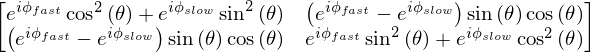

In [8]:
M_waveplate

Phase retardation of left circularly polarized light upon reflection:

In [9]:
phi_L

## Define Jones matrices
Incoming light:

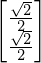

In [10]:
E_in = (1/sqrt(2)) * ones(2, 1)
E_in

EOM on the way in:

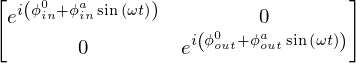

In [11]:
M_EOM_there = Matrix([[exp(I * phi_in_t), 0], [0, exp(I * phi_out_t)]])
M_EOM_there

EOM on the way back:

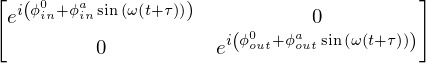

In [12]:
M_EOM_back = Matrix([[exp(I * phi_in_tau), 0], [0, exp(I * phi_out_tau)]])
M_EOM_back

Fiber is the same on the way there or back:

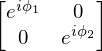

In [13]:
M_fiber = Matrix([[exp(I * phi_1), 0], [0, exp(I * phi_2)]])
M_fiber

$\lambda / 4$ plate on the way in (at $\pi / 4$ angle):

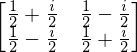

In [14]:
M_lambda_there = simplify(M_waveplate.subs([(theta, pi/4), (phi_fast, 0), (phi_slow, pi/2)]))
M_lambda_there

$\lambda / 4$ plate on the way in (at $- \pi / 4$ angle):

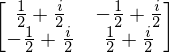

In [15]:
M_lambda_back = simplify(M_waveplate.subs([(theta, - pi/4), (phi_fast, 0), (phi_slow, pi/2)]))
M_lambda_back

Reflecting sample with circular eigen polarizations:

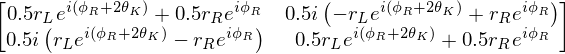

In [16]:
M_sample = (1/2) * Matrix([[r_R * exp(I * phi_R) + r_L * exp(I * phi_L),
                            I * (  r_R * exp(I * phi_R) - r_L * exp(I * phi_L))],
                           [I * (- r_R * exp(I * phi_R) + r_L * exp(I * phi_L)),
                            r_R * exp(I * phi_R) + r_L * exp(I * phi_L)]])
M_sample

Verify right and left polarizations are eigenvectors with eigenvalues $r_R e^{i \phi_R}$ and $r_L e^{i \phi_L}$ respectively:

In [17]:
simplify(M_sample * right) == r_R * exp(I * phi_R) * right

True

In [18]:
simplify(M_sample * left)  == r_L * exp(I * phi_L) * left

True

Flip of coordinates upon reflection - don't actually need that, I think.

## Light passing through each element
Initial polarization:

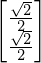

In [44]:
E = E_in
simplify(E)

After Electro-Optic Modulator:

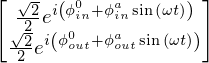

In [45]:
E = M_EOM_there * E
simplify(E)

After fiber:

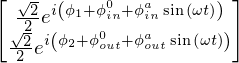

In [46]:
E = M_fiber * E
simplify(E)

After $\lambda / 4$ plate:

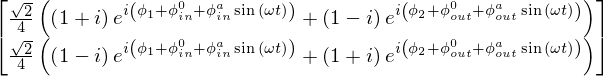

In [47]:
E = M_lambda_there * E
simplify(E)

After reflection from the sample (ugly!):

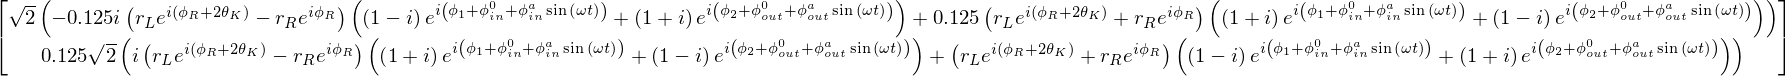

In [48]:
E = M_sample * E
simplify(E)

After $\lambda / 4$ plate on the way back:

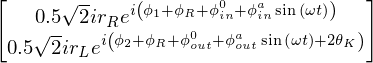

In [49]:
E = M_lambda_back * E
simplify(E)

After fiber on the way back:

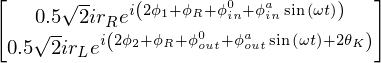

In [50]:
E = M_fiber * E
simplify(E)

After EOM on the way back:

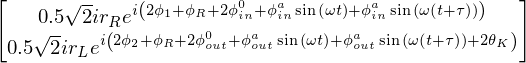

In [51]:
E = M_EOM_back * E
simplify(E)

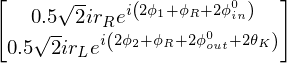

In [54]:
E_tau = E.subs(tau, pi/omega)
simplify(E_tau)